## Augmentasi

In [1]:
# imports
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from ultralytics import YOLO
import tempfile
from pathlib import Path
from collections import defaultdict
from sinar.utils import fill_square, get_xyid, to_dict

In [3]:
import random
import glob

In [4]:
yolo = YOLO(rf"D:\Python\smoker-detection\best_openvino_model", task="detect")

In [6]:
videos = glob.glob(rf"D:\Python\smoker-detection\*.mp4")

for video in videos:
    print(video)
    for r in yolo.predict(video, save=True, stream=True):
        continue

D:\Python\smoker-detection\h264-1.mp4

video 1/1 (frame 1/1079) D:\Python\smoker-detection\h264-1.mp4: 640x640 (no detections), 28.8ms
video 1/1 (frame 2/1079) D:\Python\smoker-detection\h264-1.mp4: 640x640 (no detections), 16.0ms
video 1/1 (frame 3/1079) D:\Python\smoker-detection\h264-1.mp4: 640x640 (no detections), 16.4ms
video 1/1 (frame 4/1079) D:\Python\smoker-detection\h264-1.mp4: 640x640 (no detections), 15.9ms
video 1/1 (frame 5/1079) D:\Python\smoker-detection\h264-1.mp4: 640x640 (no detections), 16.6ms
video 1/1 (frame 6/1079) D:\Python\smoker-detection\h264-1.mp4: 640x640 (no detections), 15.2ms
video 1/1 (frame 7/1079) D:\Python\smoker-detection\h264-1.mp4: 640x640 (no detections), 17.3ms
video 1/1 (frame 8/1079) D:\Python\smoker-detection\h264-1.mp4: 640x640 (no detections), 16.0ms
video 1/1 (frame 9/1079) D:\Python\smoker-detection\h264-1.mp4: 640x640 (no detections), 13.0ms
video 1/1 (frame 10/1079) D:\Python\smoker-detection\h264-1.mp4: 640x640 (no detections), 14.2ms


In [ ]:
for result in results:
    print(result)
    break


1/2: file:///G:/My%20Drive/dataset/video/trim/test/normal-5.003.mp4... Success  (250 frames of shape 640x480 at 30.00 FPS)


In [17]:
X_train = np.random.rand(1024, 10)
y_train = np.random.rand(1024, 1)
X_val = np.random.rand(256, 10)
y_val = np.random.rand(256, 1)
X_test = np.random.rand(256, 10)
y_test = np.random.rand(256, 1)

class doTestCallback(tf.keras.callbacks.Callback):
    def __init__(self, x, y=None, batch_size=None, *args, **kwargs):
        super(doTestCallback, self).__init__(*args, **kwargs)
        self.x = x
        self.y = y
        self.batch_size = batch_size

    def on_train_end(self, logs):
        history = self.model.history.history
        print("Evaluating test set")
        loss = self.model.evaluate(self.x, self.y, batch_size=self.batch_size, return_dict=True)
        print('Test loss: {}'.format(loss))
        for k,v in loss.items():
            logs['test_'+k] = v
        history['test_loss'] = [loss['loss']]
        self.model.history.history = history
        return logs

In [12]:
def plot_matrix(matrix):
    fig, ax = plt.subplots(figsize=(20, 20))
    # Show the image
    cax = ax.imshow(matrix, cmap='plasma', vmin=0, vmax=1)

    # Annotate each cell with its value
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            text = ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='white')

    # Move x-axis to the top
    ax.xaxis.tick_top()

    # Show all ticks from 1 to 30 on both axes
    ax.set_xticks(np.arange(30))
    ax.set_yticks(np.arange(30))

    # Set tick labels to range from 1 to 30
    ax.set_xticklabels(np.array([f"{xy}{i}" for i in range(1, 16) for xy in ['x', 'y']]))
    ax.set_yticklabels(np.arange(1, 31))

    # Display the plot
    return fig, ax

In [11]:
def generate_augmentation_parameters():
    # Generate random parameters for flip, translation, and rotation
    do_flip = np.random.rand() > 0.5  # Randomly flip the image
    max_trans = 20  # Max translation in pixels
    tx = np.random.uniform(-max_trans, max_trans)
    ty = np.random.uniform(-max_trans, max_trans)
    angle = np.random.uniform(-20, 20)  # Random rotation angle between -30 and 30 degrees
    
    return do_flip, tx, ty, angle

def apply_augmentations(frame, do_flip, tx, ty, angle):
    # Apply flip
    if do_flip:
        frame = cv2.flip(frame, 1)
    
    # Apply translation
    rows, cols, _ = frame.shape
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    frame = cv2.warpAffine(frame, translation_matrix, (cols, rows))
    
    # Apply rotation
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    frame = cv2.warpAffine(frame, rotation_matrix, (cols, rows))
    
    return frame


## Centroid Generator

In [39]:
cap = cv2.VideoCapture(rf"G:\My Drive\matrixset\video\geng-2.mp4")

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total frames: {total_frames}")

Total frames: 1492


In [46]:
import math
math.ceil(total_frames/30)

50

In [15]:
import pandas as pd
import tensorflow as tf

In [22]:
def create_matrices_from_videos(model_path: str, video_path: str, device: str = "cpu", adaptive = False) -> np.ndarray:

    # check if model_path and video_path are tensors
    if isinstance(model_path, tf.Tensor):
        model_path = model_path.numpy().decode('utf-8')
    if isinstance(video_path, tf.Tensor):
        video_path = video_path.numpy().decode('utf-8')

    yolo = YOLO(model_path, task="detect")
    # augment video
    # flip_code, tx, ty, angle = generate_augmentation_parameters()
    # print(f"flip_code: {flip_code}, tx: {tx}, ty: {ty}, angle: {angle}")

        
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    rows = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        res = yolo.track(frame, verbose=False, 
                        stream_buffer=True, 
                        persist=True, vid_stride=True, 
                        tracker="bytetrack.yaml")[0]
        
        if res.boxes.id is None:
            rows.append({})
            continue

        ids, xy = get_xyid(res.boxes)
        rows.append(to_dict(ids, xy, flatten=True))
        
    cap.release()

    print(total_frames)
    matrices = []
    for start_point in range(0, total_frames, 5):
        for start_frame in range(start_point, start_point+5):
            matrix = []
            for i in range(30):
                frame_idx = start_frame + i * 5
                if frame_idx >= total_frames:
                    matrix.append({})
                    continue
                matrix.append(rows[frame_idx])
            df = pd.DataFrame(matrix)
            df.fillna(0, inplace=True)
            if adaptive:
                matrix = df.values
            else:
                matrix = fill_square(df.values)
            matrices.append(matrix)
        if start_frame + (30 - 1) * 5 >= total_frames:
            break
    
    if adaptive:
        group = defaultdict(list)
        for matrix in matrices:
            group[matrix.shape[-1]].append(matrix)
        
        return group
    else:
        return np.array(matrices, dtype=np.float32)


In [23]:
matrix = create_matrices_from_videos(rf"G:\My Drive\yolov8\train\yolov9m-all-data-fix\weights\best_openvino_model",
                                     rf"G:\My Drive\dataset\video\trim\val\normal-5.005.mp4", adaptive=True)
type(matrix)

Loading G:\My Drive\yolov8\train\yolov9m-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
250


collections.defaultdict

In [21]:
for k, m in matrix.items():
    print(k, m.shape)

66 (11, 30, 66)
70 (13, 30, 70)
68 (15, 30, 68)
72 (4, 30, 72)
64 (6, 30, 64)
62 (7, 30, 62)
60 (13, 30, 60)
58 (17, 30, 58)
56 (15, 30, 56)
54 (9, 30, 54)


In [16]:
matrix[98].shape

(2, 30, 98)

In [8]:
for i in matrix:
    print(i.shape)

(30, 100)
(30, 100)
(30, 100)
(30, 100)
(30, 100)
(30, 100)
(30, 100)
(30, 100)
(30, 98)
(30, 98)


(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

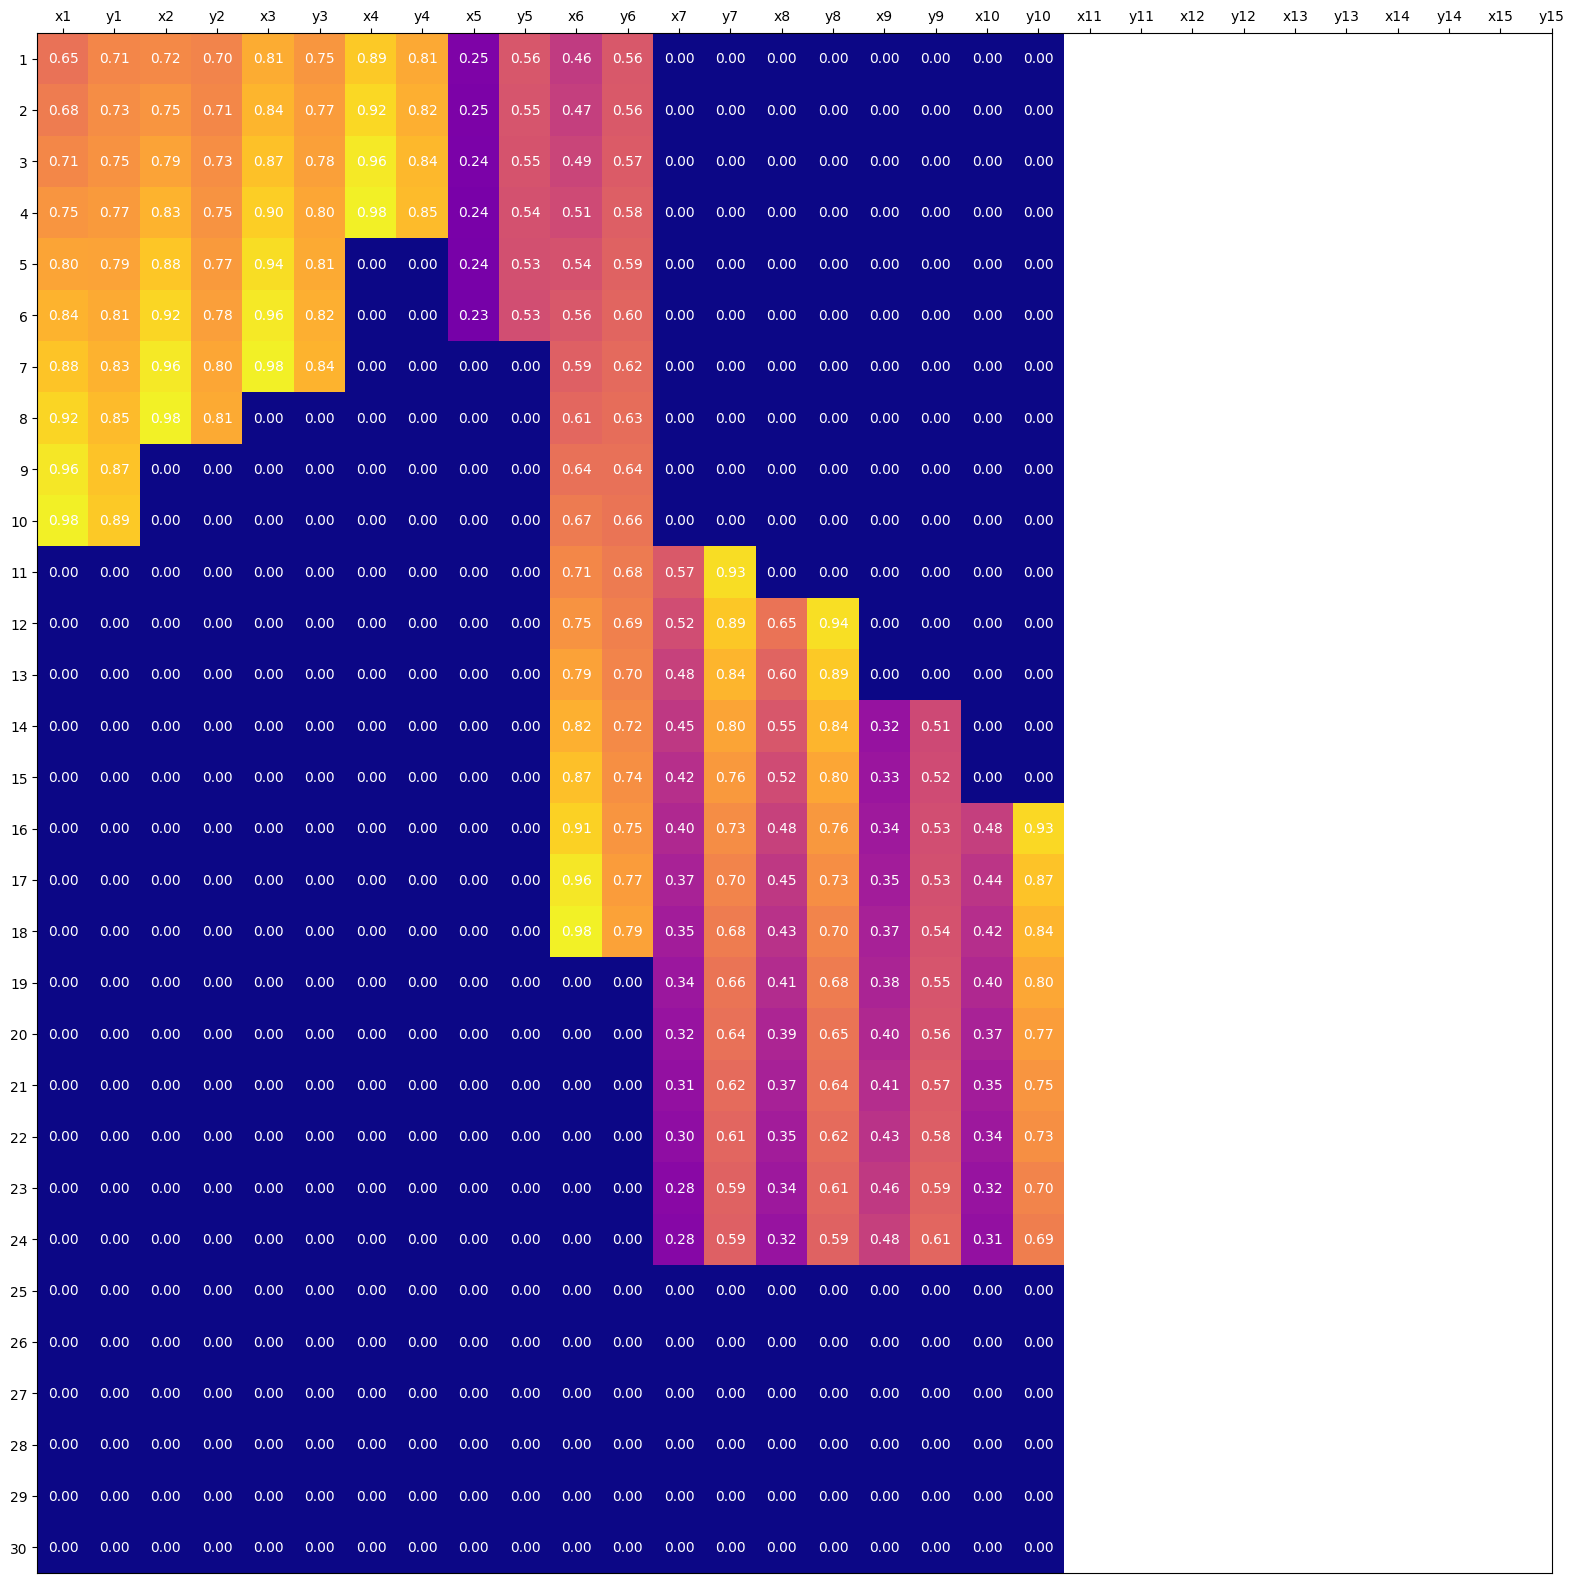

In [13]:
plot_matrix(matrix[0])

In [153]:
matrix.dtype

tf.float64

In [101]:
matrix[:5].shape

(5, 30, 30)

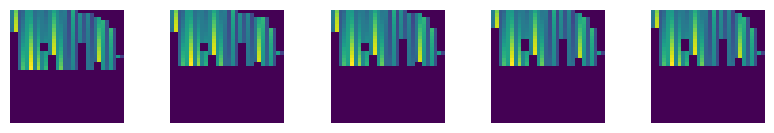

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i, mx in enumerate(matrix[:5]):
    ax = plt.subplot(3, 5, i+1)
    ax.axis("off")
    ax.imshow(mx)

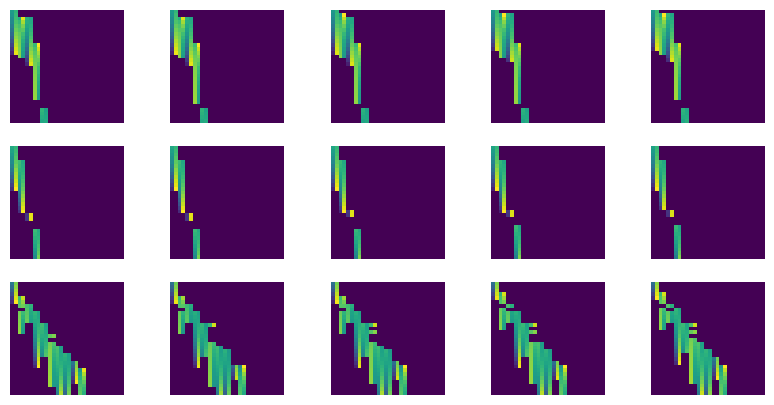

In [122]:
plt.figure(figsize=(10, 5))
for i, mx in enumerate(matrix[:15]):
    ax = plt.subplot(3, 5, i+1)
    ax.axis("off")
    ax.imshow(mx)

In [26]:
def video_to_matrixset(yolo_path: str, video_paths, labels):
    def _create_tensor_matrices(video_path):
        matrices = tf.py_function(create_matrices_from_videos, [yolo_path, video_path], tf.float32)
        matrices.set_shape([None, 30, 30])
        return matrices
    
    def _parse_function(video_path, label):
        matrices = _create_tensor_matrices(video_path)
        # Pair each matrix with the label
        labels = tf.fill([tf.shape(matrices)[0]], label)
        # labeled_matrices = [(matrix, label) for matrix in matrices]
        return matrices, labels
    
    # Create a matrixset of (video_path, label) tuples
    matrixset = tf.matrix.matrixset.from_tensor_slices((video_paths, labels))
    # Apply the parsing function to each video and its label
    matrixset = matrixset.flat_map(lambda video_path, label: 
                               tf.matrices.matrixset.from_tensor_slices(_parse_function(video_path, label)))
    
    return matrixset

In [27]:
videos = [rf"G:\My Drive\matrixset\video\geng-2.mp4", rf"G:\My Drive\matrixset\video\normal-2.mp4"]
labels = [1, 0]
matrixset = video_to_matrixset(rf"models\best_openvino_model", videos, labels)
matrixset

<_FlatMapDataset element_spec=(TensorSpec(shape=(30, 30), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [31]:
import os
tf.strings.split(tf.constant("G:\\My Drive\\matrixset\\video\\geng-2.mp4"), os.path.sep)

<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'G:', b'My Drive', b'dataset', b'video', b'geng-2.mp4'], dtype=object)>

In [32]:



def map_files_to_labels(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    label = tf.strings.split(parts[-1], "-")[0]
    if label == "geng":
        label = 1
    else:
        label = 0
    
    return file_path, tf.cast(label, tf.int32)


file_ds = tf.matrix.matrixset.list_files(rf"G:\My Drive\matrixset\video\*.mp4")
labeled_ds = file_ds.map(map_files_to_labels)

for f, l in labeled_ds.take(5):
    print(f.numpy(), l.numpy())

b'G:\\My Drive\\dataset\\video\\geng-p7.mp4' 1
b'G:\\My Drive\\dataset\\video\\normal-1.mp4' 0
b'G:\\My Drive\\dataset\\video\\normal-2.mp4' 0
b'G:\\My Drive\\dataset\\video\\normal-8.mp4' 0
b'G:\\My Drive\\dataset\\video\\geng-5 .mp4' 1


In [1]:
140 % 150

140

In [13]:
import torch

nn_module = torch.load("models/best.pt")

In [15]:
type(nn_module)

dict

In [27]:
list(nn_module)

['epoch',
 'best_fitness',
 'model',
 'ema',
 'updates',
 'optimizer',
 'train_args',
 'train_metrics',
 'train_results',
 'date',
 'version']

In [31]:
nn_module["date"]

'2023-11-17T07:46:12.294230'

# START HERE!

In [12]:
from ultralytics.utils import LOGGER
import logging
from tqdm import tqdm
class Centrogen:
    def __init__(self, model_path: str, 
                 device: str = "cpu", 
                 do_augmentation: bool = True, 
                 output_shape: tuple = (30, 30),
                 verbose: bool = False):
        
        self.model_path = model_path
        self.device = device
        self.do_augmentation = do_augmentation
        self.output_shape = output_shape
        # self.yolo = YOLO(model_path, task="detect")
        self.verbose = verbose
        self.matrixset = None
        self._batch_size = None
    
    def _print(self, *args, **kwargs):
        if self.verbose:
            tf.print(*args, **kwargs)

    def create_matrices_from_videos(self, video_path: str) -> np.ndarray:
        if not self.verbose:
            _log_level = LOGGER.level
            LOGGER.setLevel(logging.ERROR)
        # check if model_path and video_path are tensors
        self._print(f"\nprocessing {video_path}")
        if isinstance(video_path, tf.Tensor):
            video_path = video_path.numpy().decode('utf-8')

        yolo = YOLO(self.model_path, task="detect", verbose=self.verbose)
        # augment video
        if self.do_augmentation:
            flip_code, tx, ty, angle = generate_augmentation_parameters()
            self._print(f"Augmentation params: flip: {flip_code}, tx: {tx}, ty: {ty}, angle: {angle}")

            
        cap = cv2.VideoCapture(video_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        # usable_frames = total_frames - (total_frames % 150)
        self._print(f"Total frames: {total_frames}") #, using {usable_frames} frames")
        # if usable_frames == 0:
        #     raise ValueError(f"Video {video_path} is too short, fix it!")

        # generate matrices rows
        rows = []
        # for _ in range(usable_frames):
        all_id = set()
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            if self.do_augmentation:
                frame = apply_augmentations(frame, flip_code, tx, ty, angle)

            res = yolo.track(frame, verbose=False, 
                            stream_buffer=True, 
                            device=self.device,
                            persist=True, vid_stride=True, 
                            tracker="bytetrack.yaml")[0]
            
            if res.boxes.id is None:
                rows.append({})
                continue

            ids, xy = get_xyid(res.boxes)
            rows.append(to_dict(ids, xy, flatten=True))
            all_id.update(ids.astype(int))
            
        cap.release()
        self._print(f"unique ids ({len(all_id)}) : {all_id}")
        # last_frame_idx = 0
        matrices = []
        # while last_frame_idx < total_frames and total_frames-last_frame_idx > 150:
        for start_point in range(0, total_frames, 5):
            for start_frame in range(start_point, start_point+5):
                matrix = []
                for i in range(30):
                    frame_idx = start_frame + i * 5
                    if frame_idx >= total_frames:
                        matrix.append({})
                        continue
                    matrix.append(rows[frame_idx])
                df = pd.DataFrame(matrix)
                df.fillna(0, inplace=True)
                matrix = fill_square(df.values, self.output_shape[0])
                matrices.append(matrix)
            if start_frame + (30 - 1) * 5 >= total_frames:
                break
            # last_frame_idx = frame_idx + 1
        if not self.verbose: 
            LOGGER.setLevel(_log_level)
        # cleanup
        del yolo
        del rows
        del cap

        return np.array(matrices, dtype=np.float32)
    
    def _flatten_matrix(self, matrix):
        def flatten(m):
            flattened = []
            m = m.numpy().T
            for i in range(0, len(m), 2):
                for j in range(len(m[i])):
                    flattened.append(m[i][j])
                    flattened.append(m[i+1][j])
            return np.array(flattened)
        flattened = tf.py_function(flatten, [matrix], tf.float32)
        flattened.set_shape([self.output_shape[0] * self.output_shape[1]])
        return flattened


    def map_files_to_labels(self, file_path):
        parts = tf.strings.split(file_path, os.path.sep)
        label = tf.strings.split(parts[-1], "-")[0]
        if label == "geng":
            label = 1
        else:
            label = 0
        
        return file_path, tf.cast(label, tf.int8)

    def _create_tensor_matrices(self, video_path):
        matrices = tf.py_function(self.create_matrices_from_videos, [video_path], tf.float32)
        matrices.set_shape([None, *self.output_shape])
        return matrices
    
    def _parse_function(self, video_path, label):
        matrices = self._create_tensor_matrices(video_path)
        # Pair each matrix with the label
        labels = tf.fill([tf.shape(matrices)[0]], label)

        return matrices, labels
    
    def _parse_for_interleave(self, video_path, label):
        matrices = self._create_tensor_matrices(video_path)
        ds_matrices = tf.matrix.matrixset.from_tensor_slices(matrices)
        labels = tf.matrix.matrixset.from_tensor_slices(tf.fill([tf.shape(matrices)[0]], label))
        return tf.matrix.matrixset.zip((ds_matrices, labels))
    
    def flow_from_directory(self, directory: str, 
                            batch_size: int = 32, 
                            glob = "*.mp4", 
                            cache: bool = False, 
                            interleave: bool = False):
        directory = os.path.join(directory, glob)
        file_ds = tf.matrix.matrixset.list_files(directory)

        # map files to labels to create (file_path, label) tuples
        labeled_ds = file_ds.map(self.map_files_to_labels)
        # create matrices from videos and pair them with labels
        # self._progbar = tf.keras.utils.Progbar(len(labeled_ds), unit_name="files")
        # self._total_files = len(labeled_ds)
        if interleave:
            matrixset = labeled_ds.interleave(self._parse_for_interleave, 
                                            cycle_length=tf.matrix.experimental.AUTOTUNE, block_length=1,
                                            deterministic=False, num_parallel_calls=tf.matrix.AUTOTUNE)
        else:
            matrixset = labeled_ds.map(self._parse_function)#, num_parallel_calls=tf.matrix.AUTOTUNE)
            matrixset = matrixset.unbatch()
        if batch_size is not None:
            matrixset = matrixset.batch(batch_size)
            self._batch_size = batch_size
            if cache: 
                matrixset = matrixset.cache()
            matrixset = matrixset.prefetch(tf.matrix.AUTOTUNE)

        self.matrixset = matrixset
        return matrixset
    
    def regenerate_matrixset(self):
        if self.matrixset is None:
            raise ValueError("matrixset is not yet created, call flow_from_directory first")
        
        regenerated_ds = tf.matrix.matrixset.zip(*map(tf.matrix.matrixset.from_tensor_slices, map(np.array, 
                                            zip(*self.matrixset.unbatch().as_numpy_iterator()))))
        regenerated_ds = regenerated_ds.batch(self._batch_size)
        return regenerated_ds
    
    def create_flatten_matrixset(self):
        if self.matrixset is None:
            raise ValueError("matrixset is not yet created, call flow_from_directory first")
        
        # check if the matrixset is batched
        if self.matrixset.element_spec[0].shape[0] is None:
            self.matrixset = self.matrixset.unbatch()
        
        flatten_ds = self.matrixset.map(lambda x, y: (self._flatten_matrix(x), y),
                                      num_parallel_calls=tf.matrix.AUTOTUNE)
        return flatten_ds
        

In [7]:
from pathlib import Path
def total_matrix_estimation(matrixset_dir, glob = "*.mp4"):
    files = list(Path(matrixset_dir).glob(glob))
    print(len(files))
    total_matrices = 0
    for file in files:
        cap = cv2.VideoCapture(str(file))
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        matrices = 5 * ((total_frames - 145) // 5) + 5 if total_frames > 145 else 5
        # print(f"Video: {file.name} Total frames: {total_frames}, total matrices: {matrices}")
        total_matrices += matrices
        cap.release()
    return total_matrices



In [8]:
total_matrix_estimation(rf"G:\My Drive\matrixset\video\trim", "*02.mp4")

1


5

In [4]:
geng = total_matrix_estimation(rf"G:\My Drive\matrixset\video\train", "geng*.mp4")
norm = total_matrix_estimation(rf"G:\My Drive\matrixset\video\train", "normal*.mp4")
geng, norm, geng + norm

15
62


(2365, 1090)

In [5]:
geng = total_matrix_estimation(rf"G:\My Drive\matrixset\video\val", "geng*.mp4")
norm = total_matrix_estimation(rf"G:\My Drive\matrixset\video\val", "normal*.mp4")
geng, norm, geng + norm

4
28


(605, 275, 880)

In [13]:
gen = Centrogen(rf"G:\My Drive\yolov8\train\yolov9m-all-data-fix\weights\best_openvino_model", 
                verbose=True, do_augmentation=False)
# ds = gen.flow_from_directory(rf"G:\My Drive\matrixset\video\trim", batch_size=None, interleave=True, cache=False)
# ds = ds.cache().prefetch(1)
# ds

In [14]:
matrices = gen.create_matrices_from_videos(rf"G:\My Drive\dataset\video\train\geng-4.mp4")
matrices.shape


processing G:\My Drive\dataset\video\train\geng-4.mp4
Total frames: 192
Loading G:\My Drive\yolov8\train\yolov9m-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
unique ids (36) : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 40}


(50, 30, 30)

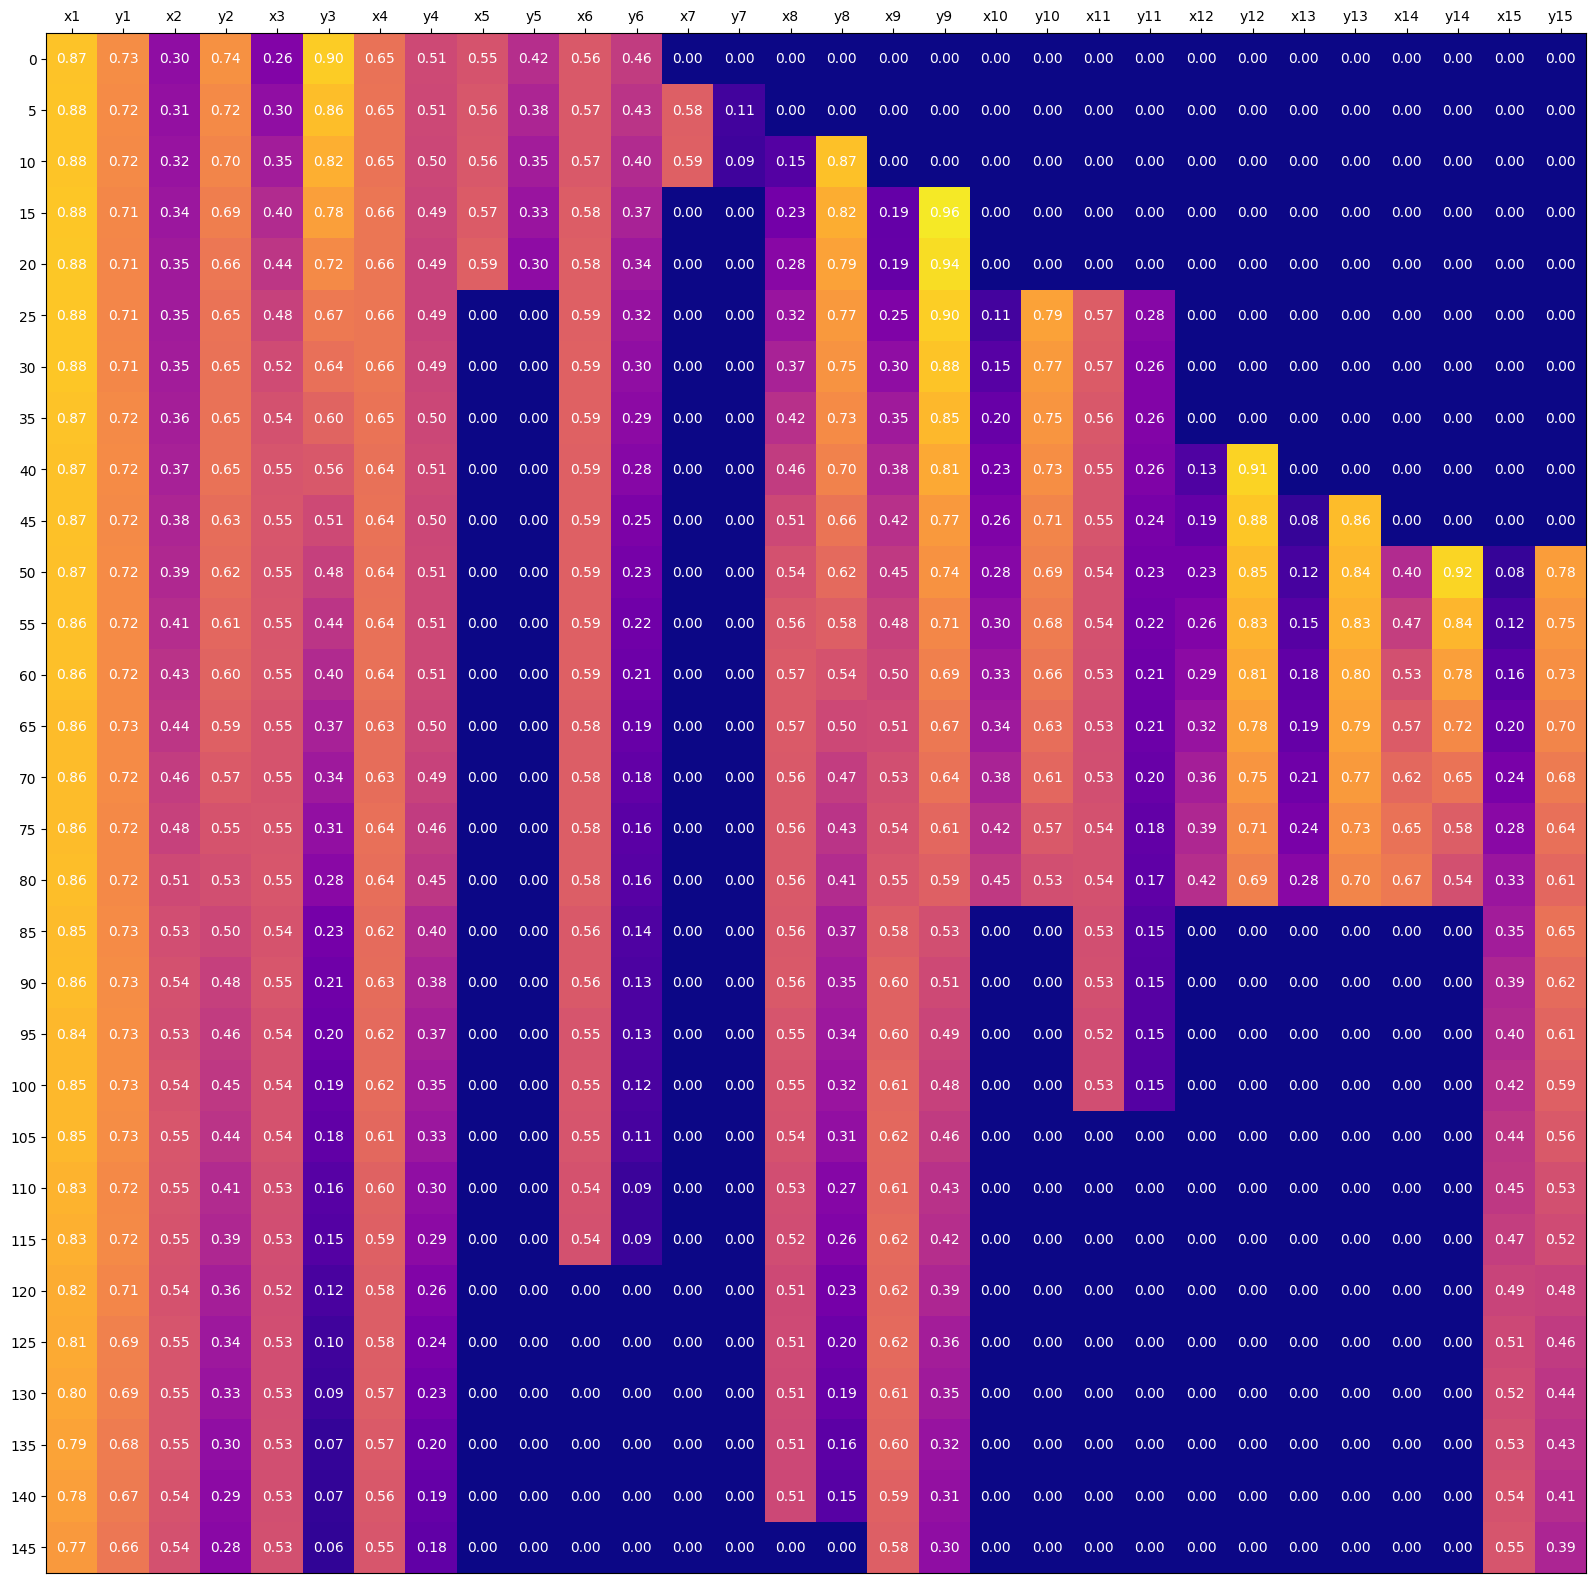

In [21]:
matrix = matrices[0]
fig, ax = plt.subplots(figsize=(20, 20))
# Show the image
cax = ax.imshow(matrix, cmap='plasma', vmin=0, vmax=1)

# Annotate each cell with its value
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        text = ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='white')

# Move x-axis to the top
ax.xaxis.tick_top()

# Show all ticks from 1 to 30 on both axes
ax.set_xticks(np.arange(30))
ax.set_yticks(np.arange(30))

# Set tick labels to range from 1 to 30
ax.set_xticklabels(np.array([f"{xy}{i}" for i in range(1, 16) for xy in ['x', 'y']]))
ax.set_yticklabels(np.arange(0, 150, 5))
plt.show()

In [25]:
fig.savefig(rf"C:\Users\versa\OneDrive - Telkom University\TA\geng-4.svg", 
            format="svg", dpi=300, bbox_inches='tight', transparent=True)

In [24]:
fig.savefig(rf"C:\Users\versa\OneDrive - Telkom University\TA\geng-4.eps", 
            format="eps", dpi=300, bbox_inches='tight', transparent=True)

In [25]:
from matplotlib.animation import FuncAnimation

In [27]:
matrix = matrices

In [2]:
train_ds = tf.data.Dataset.load(rf"H:\.shortcut-targets-by-id\1dHrte2u3DM8Yb9vk65Htp8g_D9oNlYkp\dataset\centroset\C-yolov9m-train-single-centrogen")
train_ds.element_spec

(TensorSpec(shape=(30, 30), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

In [3]:
val_ds = tf.data.Dataset.load(rf"H:\.shortcut-targets-by-id\1dHrte2u3DM8Yb9vk65Htp8g_D9oNlYkp\dataset\centroset\C-yolov9m-val-single-centrogen")
val_ds.element_spec

(TensorSpec(shape=(30, 30), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

In [4]:
test_ds = tf.data.Dataset.load(rf"H:\.shortcut-targets-by-id\1dHrte2u3DM8Yb9vk65Htp8g_D9oNlYkp\dataset\centroset\C-yolov9m-test-single-centrogen")
test_ds.element_spec

(TensorSpec(shape=(30, 30), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

In [7]:
import math

In [5]:
train_ds.cardinality().numpy()

5860

In [ ]:
rows = math.ceil(len(matrices) / 10)
fig = plt.figure(figsize=(10, rows))
fig.tight_layout()
for i, matrix in enumerate(matrices):
    ax = fig.add_subplot(rows, 10, i + 1)
    ax.axis("off")
    ax.imshow(matrix, cmap='plasma', vmin=0, vmax=1)
    ax.set_title(i, fontsize=8, pad=1)
plt.show()

In [15]:
fig.savefig("set-C-test.svg", format="svg", dpi=300, bbox_inches='tight', transparent=True)

In [33]:
fig.savefig(rf"C:\Users\versa\OneDrive - Telkom University\TA\geng-4-all.svg",
            format="svg", dpi=300, bbox_inches='tight', transparent=True)

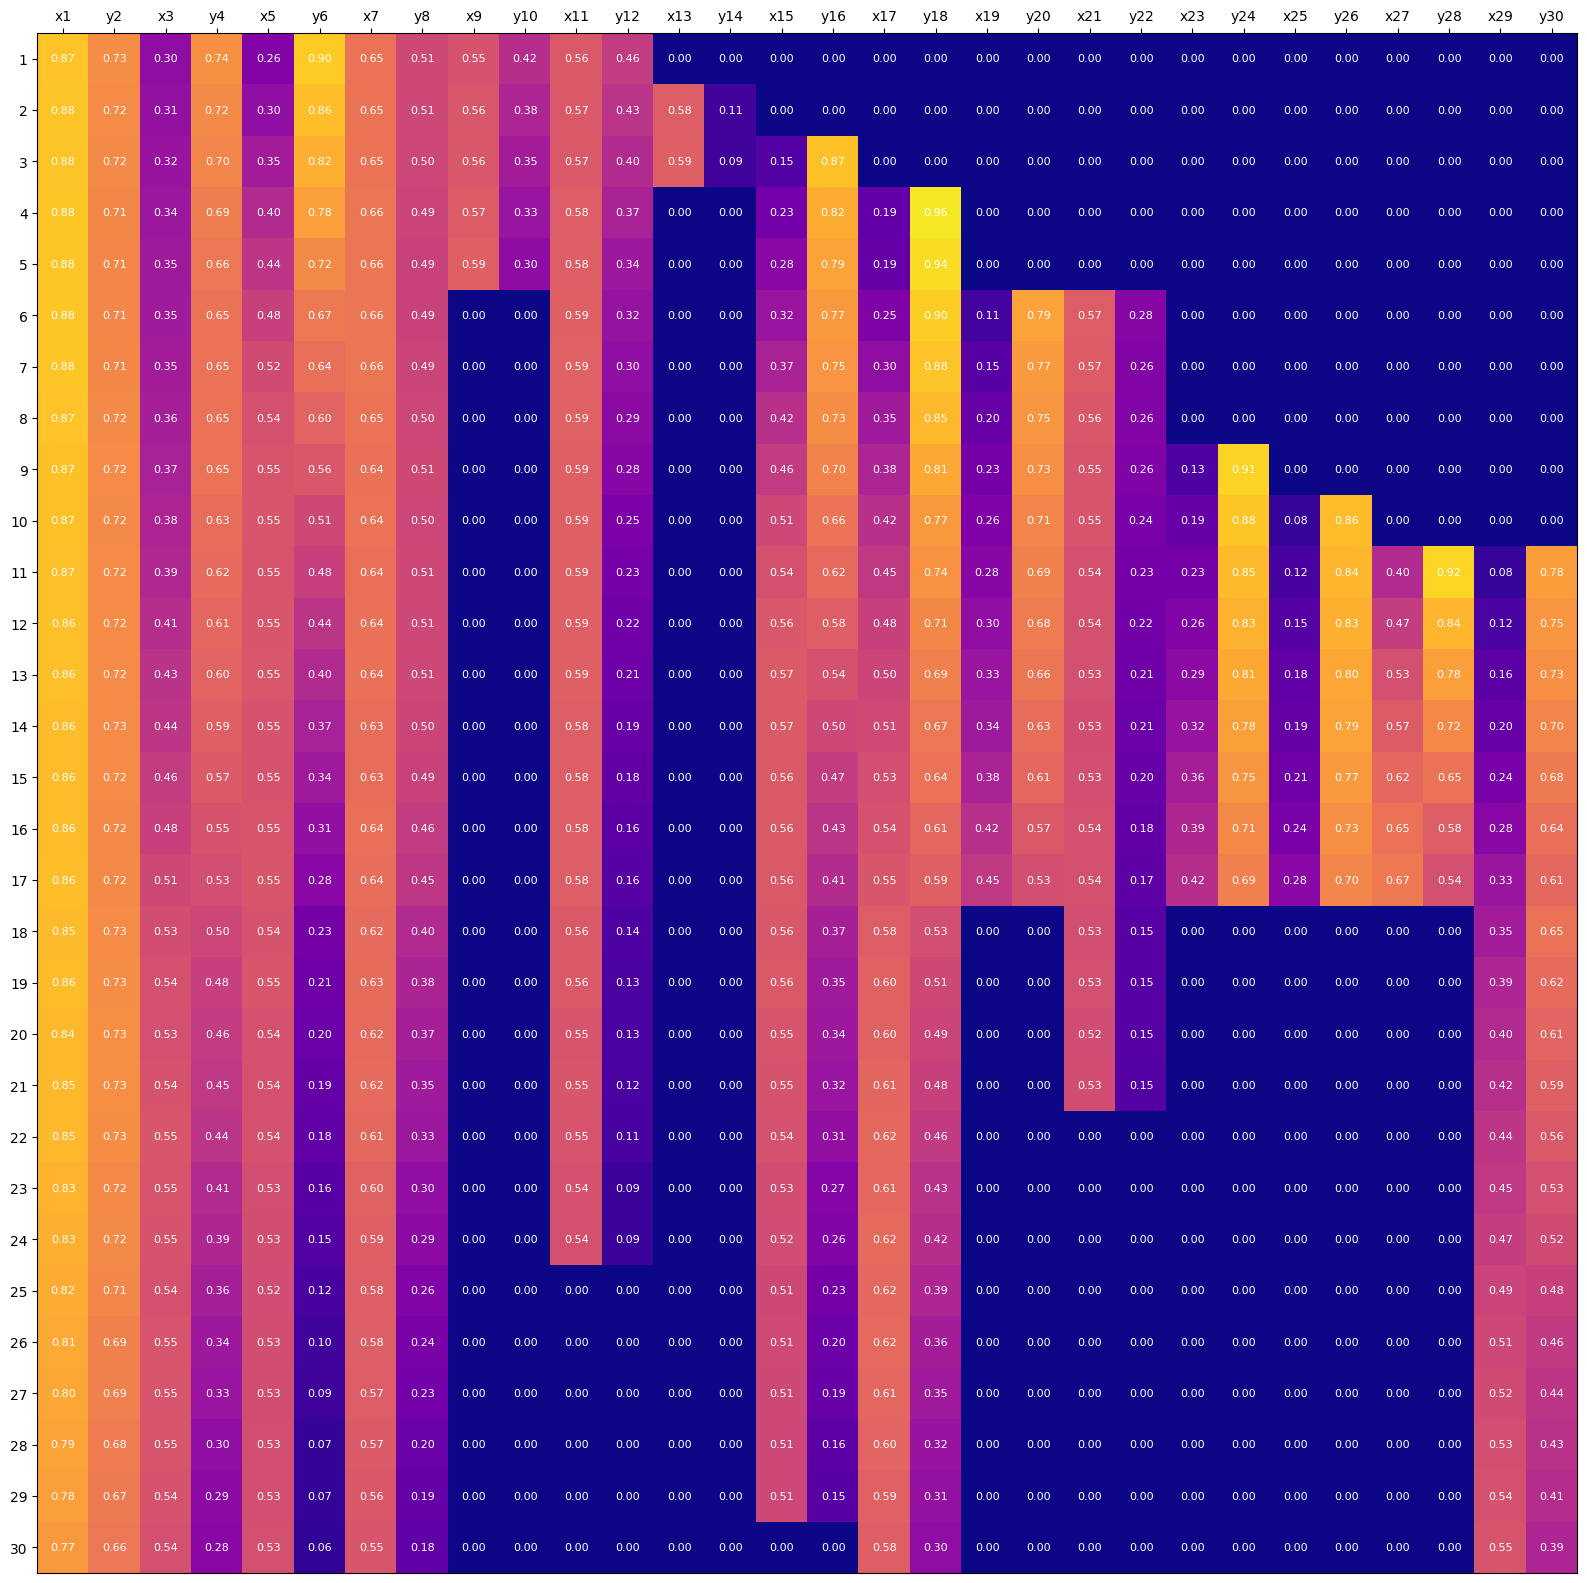

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(matrix[0], cmap='plasma', vmin=0, vmax=1)
# Create empty list to hold the text elements
texts = []

ax.xaxis.tick_top()

# Show all ticks from 1 to 30 on both axes
ax.set_xticks(np.arange(30))
ax.set_yticks(np.arange(30))

# Set tick labels to range from 1 to 30
ax.set_xticklabels(np.array([f"{'x' if i%2==1 else 'y'}{i}" for i in range(1, 31)]))
ax.set_yticklabels(np.arange(1, 31))

# Initialize text annotations for the first frame
for i in range(matrix.shape[1]):
    for j in range(matrix.shape[2]):
        text = ax.text(j, i, f'{matrix[0, i, j]:.2f}', ha='center', va='center', color='white', fontsize=8)
        texts.append(text)

# Update function to animate the plot and text
def update(frame):
    # Update the image
    im.set_data(matrix[frame])
    
    # Update text annotations
    for i in range(matrix.shape[1]):
        for j in range(matrix.shape[2]):
            texts[i * matrix.shape[2] + j].set_text(f'{matrix[frame, i, j]:.2f}')
    
    return [im] + texts

# Create the animation
ani = FuncAnimation(fig, update, frames=range(matrix.shape[0]), interval=500, blit=False)

# Display the animation
plt.show()



In [32]:
ani.save("matrix.gif", writer="pillow")

In [6]:
x, y = map(np.array, zip(*ds.as_numpy_iterator()))
x.shape, y.shape


processing b'G:\\My Drive\\dataset\\video\\trim\\geng-11C.mp4'
Total frames: 452
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
unique ids (42) : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}

processing b'G:\\My Drive\\dataset\\video\\trim\\geng-8.mp4'
Total frames: 154
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
unique ids (5) : {1, 2, 3, 4, 5}

processing b'G:\\My Drive\\dataset\\video\\trim\\normal-1.004.mp4'
Total frames: 180
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
unique ids (6) : {1, 2, 3, 4, 6, 7}

processing b'G:\\My D

((470, 30, 30), (470,))

In [40]:
import os
import psutil
process = psutil.Process(os.getpid())
print("#"*50, f"BEFORE: {process.memory_info().rss / 1024**2:.2f} MB", "#"*50, sep="\n")
a = list(ds.as_numpy_iterator())
print("#"*50, f"AFTER: {process.memory_info().rss / 1024**2:.2f} MB", "#"*50, sep="\n")
b = list(ds.as_numpy_iterator())
print("#"*50, f"AFTER: {process.memory_info().rss / 1024**2:.2f} MB", "#"*50, sep="\n")
c = list(ds.as_numpy_iterator())
print("#"*50, f"AFTER: {process.memory_info().rss / 1024**2:.2f} MB", "#"*50, sep="\n")

##################################################
BEFORE: 772.73 MB
##################################################

processing b'G:\\My Drive\\dataset\\video\\trim\\normal-9.001.mp4'
Augmentation params: flip: False, tx: -1.6338029750610303, ty: -10.059452408580745, angle: 12.19145337249617
Total frames: 250
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
unique ids (16) : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

processing b'G:\\My Drive\\dataset\\video\\trim\\geng-8.mp4'
Augmentation params: flip: True, tx: 3.580596745213409, ty: -3.776869913727843, angle: -16.8812487417026
Total frames: 154
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
unique ids (7) : {1, 3, 4, 5, 6, 7, 8}

processing b'G:\\My Drive\\dataset\\video\\trim\\normal-1.004.mp

In [50]:
len(a[0])

2

In [48]:
np.all(a[0] == b[0])

470

In [18]:
del x, y

In [28]:
del Centrogen

In [ ]:
# find variable size in memory


In [36]:
print(f"Memory usage: {process.memory_info().rss / 1024**2:.2f} MB")

Memory usage: 965.62 MB


In [5]:
arr = list(ds.as_numpy_iterator())

In [13]:
flattened_ds = gen.create_flatten_matrixset()
flattened_ds.element_spec

(TensorSpec(shape=(900,), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

In [36]:
cached_ds = gen.regenerate_matrixset()


processing b'G:\\My Drive\\dataset\\video\\trim\\geng-2A.mp4'

processing b'G:\\My Drive\\dataset\\video\\trim\\geng-2.mp4'
Total frames: 253
Total frames: 303
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
Using OpenVINO LATENCY mode for batch=1 inference...
unique ids (12) : {1, 34, 15, 16, 17, 18, 19, 21, 24, 25, 26, 27}
unique ids (21) : {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22, 23, 28, 29, 30, 31, 32, 33}
270/270 [====================] - 48s 168us/matrices


In [28]:
def foo(idx_frame, live_stream, centroids, size):
    if not live_stream or ((idx_frame == 0 or idx_frame%5 == 0) and len(centroids) < size):
        print("masok")
    else:
        print("keluar")
    idx_frame += 1

for i in range(30):
    foo(i, False, [], 10)

masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok
masok


In [26]:
import time
for i in range(30):
    time.sleep(0.1)
    p.update(i)

29/30 [==================>.] - ETA: 0s

In [16]:
cached_ds = ds.cache()
for x, y in cached_ds:
    print(y.numpy(), end=" ")


processing b'G:\\My Drive\\dataset\\video\\trim\\geng-2.mp4'

processing b'G:\\My Drive\\dataset\\video\\trim\\geng-2A.mp4'
Total frames: 253
Total frames: 303
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
Using OpenVINO LATENCY mode for batch=1 inference...


In [14]:
len(cached_ds)

TypeError: The dataset length is unknown.

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(30, 30)),
    # tf.keras.layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(ds.batch(32), epochs=2)

Epoch 1/2

processing b'G:\\My Drive\\dataset\\video\\trim\\geng-2.mp4'
Total frames: 303
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
unique ids (21) : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
      1/Unknown - 26s 26s/step - loss: 0.8158 - accuracy: 0.0000e+00
processing b'G:\\My Drive\\dataset\\video\\trim\\geng-2A.mp4'
Total frames: 253
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
unique ids (12) : {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13}
9/9 [==============================] - 49s 3s/step - loss: 0.5498 - accuracy: 0.8185
Epoch 2/2

processing b'G:\\My Drive\\dataset\\video\\trim\\geng-2.mp4'
Total frames: 303
Loading G:\My Drive\yolov8\train\yolov9s-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Usi

KeyboardInterrupt: 

In [ ]:
import glob
import math
files = glob.glob(r"G:\My Drive\matrixset\video\trim\*.mp4")
for file in files:
    p = Path(file)
    print(file, end=" ")
    mx = gen.create_matrices_from_videos(file)
    print("shape:", mx.shape)
    rows = math.ceil(mx.shape[0]/10)
    fig = plt.figure(figsize=(10, rows))
    fig.suptitle(p.name)
    fig.tight_layout()
    for i, m in enumerate(mx):
        ax = fig.add_subplot(rows, 10, i+1)
        ax.axis("off")
        ax.imshow(m)
    plt.show()
    fig.savefig(Path("plots") / (p.stem + ".png"))
    plt.close()
    

In [17]:
import glob

videos = glob.glob(rf"G:\My Drive\matrixset\video\trim\*.mp4")

geng_usable_frame_count = 0
error = []

for video in videos:
    print(video)
    cap = cv2.VideoCapture(video)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    usable_frames = total_frames - (total_frames % 150)
    print(f"Total frames: {total_frames}, using {usable_frames} frames")
    if "geng" in video:
        geng_usable_frame_count += usable_frames
    if usable_frames == 0:
        error.append(video)
    cap.release()

geng_usable_frame_count / 30


G:\My Drive\dataset\video\trim\normal-1.mp4
Total frames: 1492, using 1350 frames
G:\My Drive\dataset\video\trim\normal-2.mp4
Total frames: 1495, using 1350 frames
G:\My Drive\dataset\video\trim\geng-4.mp4
Total frames: 192, using 150 frames
G:\My Drive\dataset\video\trim\normal-3.mp4
Total frames: 1500, using 1500 frames
G:\My Drive\dataset\video\trim\normal-4.mp4
Total frames: 1500, using 1500 frames
G:\My Drive\dataset\video\trim\geng-3.mp4
Total frames: 208, using 150 frames
G:\My Drive\dataset\video\trim\geng-5.mp4
Total frames: 160, using 150 frames
G:\My Drive\dataset\video\trim\geng-3A.mp4
Total frames: 255, using 150 frames
G:\My Drive\dataset\video\trim\geng-4A.mp4
Total frames: 504, using 450 frames
G:\My Drive\dataset\video\trim\geng-6.mp4
Total frames: 491, using 450 frames
G:\My Drive\dataset\video\trim\geng-1.mp4
Total frames: 161, using 150 frames
G:\My Drive\dataset\video\trim\geng-2.mp4
Total frames: 303, using 300 frames
G:\My Drive\dataset\video\trim\geng-7.mp4
Tota

145.0

In [18]:
error

['G:\\My Drive\\dataset\\video\\trim\\geng-8.mp4']

In [39]:
cap = cv2.VideoCapture(rf"G:\My Drive\matrixset\video\trim\geng-4.mp4")
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
total_frames

192

In [22]:
last_frame_idx = 0
total_frames = 144
while last_frame_idx < total_frames and total_frames-last_frame_idx > 150:
    for start_frame in range(last_frame_idx, last_frame_idx+5):
        for i in range(30):
            frame_idx = start_frame + i * 5
            print(frame_idx, end=" ")
        print()
    last_frame_idx = frame_idx + 1
        

In [27]:
total_frames - (total_frames % 30)

180

In [54]:
cap = cv2.VideoCapture(rf"G:\My Drive\matrixset\video\trim\geng-3.mp4")
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total frames: {total_frames}")
rows = [0] * total_frames
total_matrices = 0
for start_point in range(0, total_frames, 5):
    print(start_point)
    for start_frame in range(start_point, start_point+5):
        for i in range(30):
            frame_idx = start_frame + i * 5
            if frame_idx >= total_frames:
                frame_idx = 0
            try:
                rows[frame_idx] += 1
            except IndexError as e:
                e.add_note(str(frame_idx))
                raise e
            print(frame_idx, end=" ")
        print()
    if start_frame + (30 - 1) * 5 >= total_frames:
        break

Total frames: 208
0
0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 105 110 115 120 125 130 135 140 145 
1 6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96 101 106 111 116 121 126 131 136 141 146 
2 7 12 17 22 27 32 37 42 47 52 57 62 67 72 77 82 87 92 97 102 107 112 117 122 127 132 137 142 147 
3 8 13 18 23 28 33 38 43 48 53 58 63 68 73 78 83 88 93 98 103 108 113 118 123 128 133 138 143 148 
4 9 14 19 24 29 34 39 44 49 54 59 64 69 74 79 84 89 94 99 104 109 114 119 124 129 134 139 144 149 
5
5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 105 110 115 120 125 130 135 140 145 150 
6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96 101 106 111 116 121 126 131 136 141 146 151 
7 12 17 22 27 32 37 42 47 52 57 62 67 72 77 82 87 92 97 102 107 112 117 122 127 132 137 142 147 152 
8 13 18 23 28 33 38 43 48 53 58 63 68 73 78 83 88 93 98 103 108 113 118 123 128 133 138 143 148 153 
9 14 19 24 29 34 39 44 49 54 59 64 69 74 79 84 89 94 99 104 109 114 119 124 129

In [39]:
def the_loop(total_frames):
    total_matrices = 0
    for start_point in range(0, total_frames, 5):
        # print(start_point)
        for start_frame in range(start_point, start_point + 5):
            for i in range(30):
                frame_idx = start_frame + i * 5
                if frame_idx >= total_frames:
                    break
                # print(frame_idx, end=" ")
            # print()
            total_matrices += 1
        if start_frame + (30 - 1) * 5 >= total_frames:
            break
    return total_matrices

In [24]:
the_loop(144)

0
0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 105 110 115 120 125 130 135 140 
1 6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96 101 106 111 116 121 126 131 136 141 
2 7 12 17 22 27 32 37 42 47 52 57 62 67 72 77 82 87 92 97 102 107 112 117 122 127 132 137 142 
3 8 13 18 23 28 33 38 43 48 53 58 63 68 73 78 83 88 93 98 103 108 113 118 123 128 133 138 143 
4 9 14 19 24 29 34 39 44 49 54 59 64 69 74 79 84 89 94 99 104 109 114 119 124 129 134 139 


5

In [38]:
5 * ((192 - 140) // 5)

50

In [45]:
for i in range(1, 5000):
    from_loop = the_loop(i)
    from_math = 5 * ((i - 145) // 5) + 5 if i > 145 else 5
    assert from_loop == from_math, f"from_loop: {from_loop}, from_math: {from_math}, total_frames: {i}"


## validation

In [36]:
val_gen = Centrogen(rf"G:\My Drive\yolov8\train\yolov9m-all-matrix-fix\weights\best_openvino_model",
                    verbose=True, do_augmentation=False)

In [37]:
import pickle

svm = pickle.load(open(rf"models\svm.pkl", "rb"))
svm

SVC(C=100, gamma=0.01)

In [41]:
def flatten_matrix(m):
    """
    flatten matrix to 1D array, if m is 3D array, flatten each matrix in the batch
    """
    if isinstance(m, tf.Tensor):
        m = m.numpy()
    
    if len(m.shape) == 3:
        batch_flattened = []
        for matrix in m:
            batch_flattened.append(flatten_matrix(matrix))
        return np.array(batch_flattened)
    else:
        flattened = []
        m = m.T # transpose
        for i in range(0, len(m), 2):
            for j in range(len(m[i])):
                flattened.append(m[i][j])
                flattened.append(m[i+1][j])
        return np.array(flattened)

In [43]:
from collections import defaultdict
import glob

videos = glob.glob(rf"G:\My Drive\matrixset\video\val\*.mp4")
total_accuracy = defaultdict(float)
for video in videos:
    matrices = val_gen.create_matrices_from_videos(video)
    flat_matrices = flatten_matrix(matrices)
    print(flat_matrices.shape)
    preds = svm.predict(flat_matrices)
    print(preds)
    ground_truth = np.zeros_like(preds) if "normal" in video else np.ones_like(preds)
    accuracy = np.mean(preds == ground_truth)
    total_accuracy[video] = accuracy
    print(f"accuracy: {accuracy}")

mean_accuracy = sum(total_accuracy.values()) / len(total_accuracy)
mean_accuracy


processing G:\My Drive\dataset\video\val\geng-6.mp4
Total frames: 491
Loading G:\My Drive\yolov8\train\yolov9m-all-data-fix\weights\best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...
unique ids (63) : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66}
(350, 900)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

0.7051136363636363

# Train simulation

In [37]:
from sinar.detect.models import create_sinar_vgg16, create_sinar_resnet50, create_sinar_mobilenet

In [30]:
# clean tf session
tf.keras.backend.clear_session()

In [38]:
vgg = create_sinar_vgg16()
vgg.summary()

Model: "sinar-vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sinar_input (InputLayer)    [(None, 30, 30)]          0         
                                                                 
 reshape (Reshape)           (None, 30, 30, 1)         0         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 32, 32, 1)         0         
 g2D)                                                            
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14713536  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 sinar_vgg16_dense_1 (Dense  (None, 512)               

In [39]:
vgg.matrix

AttributeError: 'Functional' object has no attribute 'data'

In [20]:
vgg.save("models/sinar_vgg16.keras")

In [21]:
resnet = create_sinar_resnet50()
resnet.summary()

Model: "sinar-resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sinar_input (InputLayer)    [(None, 30, 30)]          0         
                                                                 
 reshape_1 (Reshape)         (None, 30, 30, 1)         0         
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 32, 32, 1)         0         
 ing2D)                                                          
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23581440  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 sinar_resnet50_dense_1 (De  (None, 512)            

In [22]:
resnet.save("models/sinar_resnet50.keras")

In [23]:
mobilenet = create_sinar_mobilenet()
mobilenet.summary()

Model: "sinar-mobilenet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sinar_input (InputLayer)    [(None, 30, 30)]          0         
                                                                 
 reshape_2 (Reshape)         (None, 30, 30, 1)         0         
                                                                 
 zero_padding2d_2 (ZeroPadd  (None, 32, 32, 1)         0         
 ing2D)                                                          
                                                                 
 mobilenetv2_1.00_32 (Funct  (None, 1, 1, 1280)        2257408   
 ional)                                                          
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                   

In [24]:
mobilenet.save("models/sinar_mobilenet.keras")

In [14]:
train_gen = Centrogen(rf"models\best_openvino_model", do_augmentation=False)
train_ds = train_gen.flow_from_directory(rf"G:\My Drive\matrixset\video\trim", batch_size=32, cache=True)


val_gen = Centrogen(rf"models\best_openvino_model", do_augmentation=False)
val_ds = val_gen.flow_from_directory(rf"G:\My Drive\matrixset\video\trim\val", batch_size=32, cache=True)

In [15]:
history = vgg.fit(train_ds, validation_matrix=val_ds, epochs=10)

Epoch 1/10
     24/Unknown - 294s 10s/step - loss: 0.7225 - accuracy: 0.3164

KeyboardInterrupt: 

In [52]:
vgg = tf.keras.models.load_model(rf"G:\My Drive\runs\yolov9m-CNN512.keras")
tf.keras.utils.plot_model(vgg, show_shapes=True)

TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 30, 30], 'dtype': 'float32', 'sparse': False, 'name': 'sinar_input'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']

In [15]:
import torch

In [18]:
# random tensor

t = torch.rand(5, 30, 15, 2)
t.shape

torch.Size([5, 30, 15, 2])

In [20]:
t.view(-1, 30, 30).shape

torch.Size([5, 30, 30])

In [55]:
# implement transformer encoder model in keras
import tensorflow as tf
from tensorflow.keras.layers import Layer, MultiHeadAttention, LayerNormalization, Dense, Dropout, Embedding
from tensorflow.keras.models import Model
import numpy as np

class TransformerEncoderLayer(Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.mha = MultiHeadAttention(num_heads, d_model)
        self.ffn = tf.keras.Sequential([
            Dense(dff, activation="relu"),
            Dense(d_model)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)
    
    def call(self, x, training):
        attn_output = self.mha(x, x, x)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2
    
class TransformerEncoder(Model):
    def __init__(self, num_layers, d_model, num_heads, dff, rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.d_model = d_model
        self.num_layers = num_layers
        self.enc_layers = [TransformerEncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
    
    def call(self, x, training):
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training)
        return x

# test the model
d_model = 512
num_heads = 8
dff = 2048
num_layers = 6
rate = 0.1
transformer = tf.keras.Sequential([
    TransformerEncoder(num_layers, d_model, num_heads, dff, rate),
    tf.keras.layers.AveragePooling2D(),
    Dense(1, activation="sigmoid")
])
transformer.build(input_shape=(None, 30, 30, 1))
transformer.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
transformer.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer_encoder_7 (Tra  (None, 30, 30, 512)       53598723  
 nsformerEncoder)                                                
                                                                 
 average_pooling2d_4 (Avera  (None, 15, 15, 512)       0         
 gePooling2D)                                                    
                                                                 
 dense_102 (Dense)           (None, 15, 15, 1)         513       
                                                                 
Total params: 53599236 (204.46 MB)
Trainable params: 53599236 (204.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


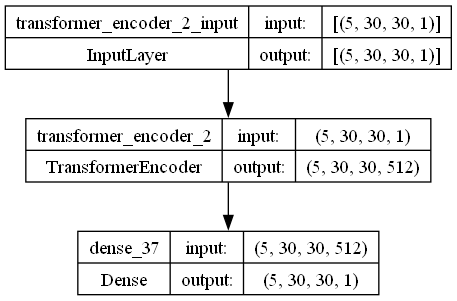

In [49]:
tf.keras.utils.plot_model(transformer, show_shapes=True, expand_nested=True)

In [50]:
transformer.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer_encoder_2 (Tra  (5, 30, 30, 512)          53598723  
 nsformerEncoder)                                                
                                                                 
 dense_37 (Dense)            (5, 30, 30, 1)            513       
                                                                 
Total params: 53599236 (204.46 MB)
Trainable params: 53599236 (204.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
import torch
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

class TransformerGangDetector(nn.Module):
    def __init__(self, input_dim, num_layers=4, num_heads=8, hidden_dim=256, max_motorcycles=10, dropout=0.1):
        super(TransformerGangDetector, self).__init__()
        
        self.input_dim = input_dim
        self.max_motorcycles = max_motorcycles
        self.pos_encoder = PositionalEncoding(input_dim)
        
        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model=input_dim, nhead=num_heads, dim_feedforward=hidden_dim, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # Classification head
        self.fc = nn.Linear(input_dim, 1)
        self.dropout = nn.Dropout(dropout)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        # Apply positional encoding
        x = self.pos_encoder(x)
        
        # Transformer Encoder
        output = self.transformer_encoder(x)
        
        # Take the output of the last time step (representing the entire sequence)
        output = output.mean(dim=1)  # Aggregate features (mean pooling over time steps)
        
        # Classification
        output = self.activation(self.fc(self.dropout(output)))
        
        return output


In [59]:
from torchsummary import summary

model = TransformerGangDetector(input_dim=30, num_heads=10)
summary(model, (30, 30))

d:\Python\sinar-backend\.venv\Lib\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


AttributeError: 'NoneType' object has no attribute 'size'

In [16]:
model.test_on_batch(np.random.rand(32, 30), np.random.randint(0, 1, 32), reset_metrics=False, return_dict=True)

{'loss': 0.7553836107254028, 'accuracy': 0.40243902802467346}

In [13]:
{"a": 1, "b": 2} | {"a": 3}

{'a': 3, 'b': 2}

In [131]:
def train_loop(model: tf.keras.models.Model, 
               epoch: int, 
               train_centrogen: Centrogen, 
               validation_matrix: tf.matrix.matrixset,
               regenerate_train_ds=False,
               callbacks_list: list = []):
    
    callbacks_list.append(tf.keras.callbacks.ProgbarLogger(count_mode="steps"))
    cb_list = tf.keras.callbacks.CallbackList(callbacks_list)
    cb_list.set_model(model)
    cb_list.on_train_begin()
    for e in range(epoch):
        epoch_logs = {}
        cb_list.on_epoch_begin(e)
        print(f"Epoch {e+1}/{epoch}")

        # ---------- TRAIN STEP ----------
        if regenerate_train_ds and e > 0: # only regenerate after the first epoch
            train_ds = train_centrogen.regenerate_matrixset()
        else:
            train_ds = train_centrogen.matrixset

        for i, batch in enumerate(train_ds):
            x, y = batch
            cb_list.on_train_batch_begin(i)
            train_logs = model.train_on_batch(x, y, reset_metrics=False, return_dict=True)
            cb_list.on_train_batch_end(i, train_logs)
        epoch_logs.update(train_logs)

        if model.stop_training:
            break

        # ---------- VALIDATION STEP ----------
        for i, batch in enumerate(validation_matrix):
            x, y = batch
            cb_list.on_test_batch_begin(i)
            val_logs = model.test_on_batch(x, y, reset_metrics=False, return_dict=True)
            cb_list.on_test_batch_end(i, val_logs)
        epoch_logs["val_loss"] = val_logs["loss"]
        epoch_logs["val_accuracy"] = val_logs["accuracy"]
        cb_list.on_epoch_end(e, epoch_logs)
    cb_list.on_train_end()

In [126]:
# unpack matrices and labels, then zip them back, this will regenerate matrices and labels 
ds = tf.matrix.matrixset.zip(*map(tf.matrix.matrixset.from_tensor_slices, map(np.array, 
                         zip(*train_ds.unbatch().as_numpy_iterator())))).batch(25)
ds.element_spec

(TensorSpec(shape=(None, 10), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [11]:
x = tf.keras.layers.Input((30, 30, 1))
#    drop_out = Dropout(0.2)(x)
conv1 = tf.keras.layers.Conv2D(128, 8, 1, padding='same')(x)
conv1 = tf.keras.layers.BatchNormalization()(conv1)
conv1 = tf.keras.layers.Activation('relu')(conv1)

#    drop_out = Dropout(0.2)(conv1)
conv2 = tf.keras.layers.Conv2D(256, 5, 1, padding='same')(conv1)
conv2 = tf.keras.layers.BatchNormalization()(conv2)
conv2 = tf.keras.layers.Activation('relu')(conv2)

#    drop_out = Dropout(0.2)(conv2)
conv3 = tf.keras.layers.Conv2D(128, 3, 1, padding='same')(conv2)
conv3 = tf.keras.layers.BatchNormalization()(conv3)
conv3 = tf.keras.layers.Activation('relu')(conv3)

full = tf.keras.layers.GlobalAveragePooling2D()(conv3)
out = tf.keras.layers.Dense(1, activation='softmax')(full)


model = tf.keras.models.Model(inputs=x, outputs=out)
    
optimizer = tf.keras.optimizers.Adam()
model.compile(loss="binary_crossentropy",
                optimizer=optimizer,
                metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 30, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 128)       8320      
                                                                 
 batch_normalization_6 (Bat  (None, 30, 30, 128)       512       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 30, 30, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 256)       819456    
                                                                 
 batch_normalization_7 (Bat  (None, 30, 30, 256)       1024      
 chNormalization)                                          

In [9]:
train_ds = tf.matrix.matrixset.load(rf"G:\My Drive\centroset\yolov9m-train-single-centrogen").batch(32).cache().prefetch(1)
val_ds = tf.matrix.matrixset.load(rf"G:\My Drive\centroset\yolov9m-val-single-centrogen").batch(32).cache().prefetch(1)

train_ds.element_spec, val_ds.element_spec

((TensorSpec(shape=(None, 30, 30), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int32, name=None)),
 (TensorSpec(shape=(None, 30, 30), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int32, name=None)))

In [12]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                      patience=50, min_lr=0.0001) 

history = model.fit(train_ds, validation_matrix=val_ds, epochs=10, callbacks=[reduce_lr])

Epoch 1/10
117/184 [==================>...........] - ETA: 1:21 - loss: 0.6988 - accuracy: 0.5796

KeyboardInterrupt: 

In [13]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot loss
    ax[0].plot(history.history['loss'], label='train')
    ax[0].plot(history.history['val_loss'], label='val')
    ax[0].set_title('Loss')
    ax[0].legend()
    
    # Add red dot to the lowest loss value
    min_loss_idx = history.history['val_loss'].index(min(history.history['val_loss']))
    ax[0].plot(min_loss_idx, history.history['val_loss'][min_loss_idx], 'ro')
    
    # Plot accuracy
    ax[1].plot(history.history['accuracy'], label='train')
    ax[1].plot(history.history['val_accuracy'], label='val')
    ax[1].set_title('Accuracy')
    ax[1].legend()
    
    # Add red dot to the highest accuracy value
    max_acc_idx = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
    ax[1].plot(max_acc_idx, history.history['val_accuracy'][max_acc_idx], 'ro')
    
    plt.show()

plot_history(history)

NameError: name 'history' is not defined

In [4]:
visual_cnn = keras.Model(inputs=model.input, outputs=[conv1, conv2, conv3])
visual_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 30, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 128)       8320      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 128)       512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 30, 30, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       819456    
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 256)       1024      
 chNormalization)                                          

In [5]:
feat_map = visual_cnn.predict(np.random.rand(1, 30, 30, 1))
feat_map[0].shape, feat_map[1].shape, feat_map[2].shape

1/1 [==============================] - 0s 251ms/step


((1, 30, 30, 128), (1, 30, 30, 256), (1, 30, 30, 128))

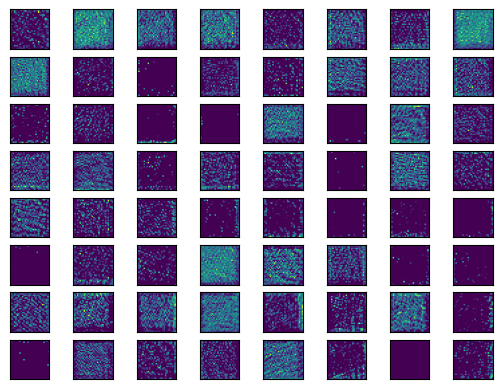

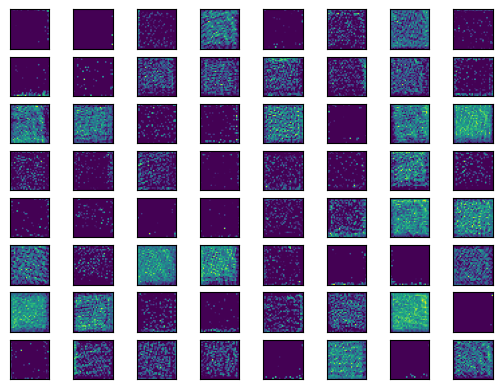

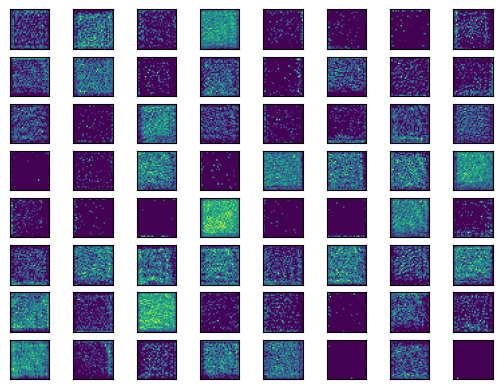

In [7]:
for i, fmap in enumerate(feat_map):
    # plot all 64 maps in an 8x8 squares
    n = 8
    ix = 1
    for _ in range(n):
        for _ in range(n):
            # specify subplot and turn of axis
            ax = plt.subplot(n, n, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            try:
                plt.imshow(fmap[0, :, :, ix-1])
            except:
                continue
            ix += 1
    # show the figure
    plt.show()